In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('data/DataPreprocessingGraded_dataset.csv')
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [8]:
target = df.pop('Target')[0:]

In [9]:
print("No. of sample = ", df.shape[0])

No. of sample =  748


In [10]:
print("No. of features = ", df.shape[1])

No. of features =  5


In [11]:
df.isin(['?']).sum(axis=0)

V1    5
V2    5
V3    0
V4    0
V5    0
dtype: int64

In [12]:
df.replace('?',0, inplace=True)
df.replace('NEGATIVE', 0, inplace=True)

In [13]:
df = df.astype('float')

In [14]:
for i in df.columns:
    print('Variance of',i,'is', np.var(df[i]))

Variance of V1 is 65.58689660842461
Variance of V2 is 33.565643855986735
Variance of V3 is 2128245.1734035863
Variance of V4 is 593.4297860247648
Variance of V5 is 0.0


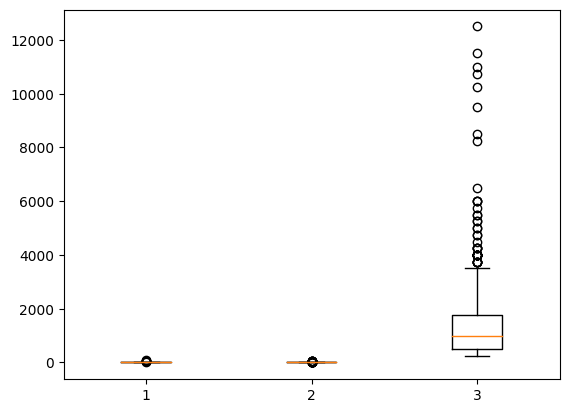

In [12]:
plt.boxplot([df.V1,df.V2,df.V3])
plt.show()

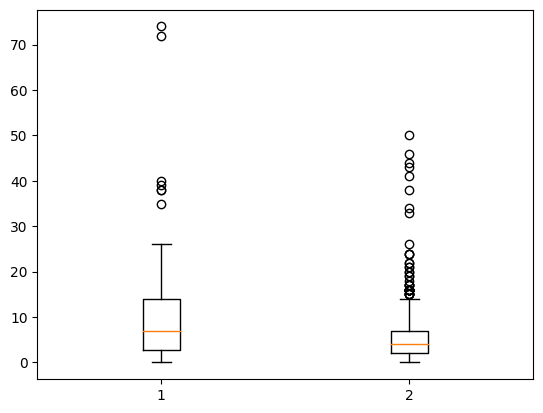

In [13]:
plt.boxplot([df.V1,df.V2])
plt.show()

In [15]:
target.value_counts()

NO     570
YES    178
Name: Target, dtype: int64

In [16]:
from sklearn.impute import SimpleImputer, KNNImputer

In [22]:
si = SimpleImputer(strategy = 'median')

In [88]:
si.fit_transform(df)[:,0].mean()

9.498663101604278

In [89]:
kn = KNNImputer(n_neighbors=3)

In [90]:
kn.fit_transform(df)[:,0].mean()

9.498663101604278

In [17]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression

si = SimpleImputer(strategy='mean')
ss = StandardScaler()
oe = OrdinalEncoder()

In [18]:
SI = ('1,2,3,4', si, [0, 1])
SS = ('2', ss, [0, 1, 2, 3])
OE = ('5', oe, [4])

In [19]:
pipe11 = ('pipe_1', ColumnTransformer([SI, ('pass', 'passthrough', [2,3,4])]))
pipe12 = ('pipe_2', ColumnTransformer([SS]))
pipe21 = ('pipe_3', ColumnTransformer([OE]))

In [20]:
pipe1 = Pipeline([pipe11,pipe12])
pipe2 = Pipeline([pipe21])

In [21]:
fu = FeatureUnion([('LHS',pipe1),('RHS',pipe2)])
vt = VarianceThreshold(0.1)
X = fu.fit_transform(df)

In [22]:
fin = Pipeline([('featUnion',fu),('varThreshold',vt)])
X = fin.fit_transform(df)
len(fin.get_feature_names_out())

4

In [23]:
fin

Pipeline(steps=[('featUnion',
                 FeatureUnion(transformer_list=[('LHS',
                                                 Pipeline(steps=[('pipe_1',
                                                                  ColumnTransformer(transformers=[('1,2,3,4',
                                                                                                   SimpleImputer(),
                                                                                                   [0,
                                                                                                    1]),
                                                                                                  ('pass',
                                                                                                   'passthrough',
                                                                                                   [2,
                                                                                                    3,
                                                                                                    4])])),
                                                                 ('pipe_2',
                                                                  ColumnTransformer(transformers=[('2',
                                                                                                   StandardScaler(),
                                                                                                   [0,
                                                                                                    1,
                                                                                                    2,
                                                                                                    3])]))])),
                                                ('RHS',
                                                 Pipeline(steps=[('pipe_3',
                                                                  ColumnTransformer(transformers=[('5',
                                                                                                   OrdinalEncoder(),
                                                                                                   [4])]))]))])),
                ('varThreshold', VarianceThreshold(threshold=0.1))])

In [24]:
target.shape

(748,)

In [42]:
y = oe.fit_transform(np.array(target).reshape(-1,1)).reshape(-1,)

In [43]:
X.shape,y.shape

((748, 4), (748,))

In [26]:
estimator = LogisticRegression()
rf = RFE(estimator, n_features_to_select=2,step=1)

In [41]:
rf.fit(X,y)
rf.get_feature_names_out()

array(['x0', 'x2'], dtype=object)

In [46]:
from sklearn.feature_selection import SequentialFeatureSelector

sfsf = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfsb = SequentialFeatureSelector(estimator, n_features_to_select=2, direction='backward')

In [44]:
sfsf.fit(X,y)
sfsf.get_feature_names_out()

array(['x1', 'x3'], dtype=object)

In [47]:
sfsb.fit(X,y)
sfsb.get_feature_names_out()

array(['x2', 'x3'], dtype=object)